In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 20, 10
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [12]:
data = pd.read_csv('bavl_data.csv')

In [16]:
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,25.03.2009,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,26.03.2009,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,27.03.2009,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,30.03.2009,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,01.04.2009,10:00:00,0.0800,0.0810,0.0800,0.0810,790000
5,BAVL,D,02.04.2009,10:00:00,0.0825,0.0865,0.0810,0.0865,1570000
6,BAVL,D,03.04.2009,10:00:00,0.0900,0.1130,0.0900,0.1030,5140000
7,BAVL,D,06.04.2009,10:00:00,0.1055,0.1280,0.1055,0.1250,3790000
8,BAVL,D,07.04.2009,10:00:00,0.1230,0.1230,0.1197,0.1199,1240000
9,BAVL,D,08.04.2009,10:00:00,0.1100,0.1185,0.1090,0.1180,3150000


In [33]:
ts_data = data

In [34]:
ts_data['<DATE>'] = [pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']]

In [35]:
[pd.to_datetime(date, format='%dd%mm%yy', errors='ignore') for date in ts_data['<DATE>']][:10]

[Timestamp('2009-03-25 00:00:00'),
 Timestamp('2009-03-26 00:00:00'),
 Timestamp('2009-03-27 00:00:00'),
 Timestamp('2009-03-30 00:00:00'),
 Timestamp('2009-04-01 00:00:00'),
 Timestamp('2009-04-02 00:00:00'),
 Timestamp('2009-04-03 00:00:00'),
 Timestamp('2009-04-06 00:00:00'),
 Timestamp('2009-04-07 00:00:00'),
 Timestamp('2009-04-08 00:00:00')]

In [36]:
ts_data['<DATE>'] = pd.to_datetime(pd.Series(ts_data['<DATE>']), format="%d.%m.%Y")

In [37]:
ts_data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BAVL,D,2009-03-25,10:00:00,0.0500,0.0500,0.0500,0.0500,40000
1,BAVL,D,2009-03-26,10:00:00,0.0804,0.0816,0.0790,0.0810,3870000
2,BAVL,D,2009-03-27,10:00:00,0.0805,0.0805,0.0790,0.0790,1070000
3,BAVL,D,2009-03-30,10:00:00,0.0785,0.0785,0.0785,0.0785,650000
4,BAVL,D,2009-04-01,10:00:00,0.0800,0.0810,0.0800,0.0810,790000


In [39]:
ts_data = ts_data.drop(columns=['<TICKER>', '<PER>', '<TIME>', '<LOW>', '<HIGH>', '<CLOSE>', '<VOL>'])

In [40]:
ts_data.head()

,<DATE>,<OPEN>
0,2009-03-25,0.0500
1,2009-03-26,0.0804
2,2009-03-27,0.0805
3,2009-03-30,0.0785
4,2009-04-01,0.0800


In [41]:
export_csv = ts_data.to_csv ('timeseries_data.csv', index = None, header=True) 

In [45]:
ts_data = pd.Series.from_csv('timeseries_data.csv') 

In [46]:
ts_data.head()

2009-03-25    0.0500
2009-03-26    0.0804
2009-03-27    0.0805
2009-03-30    0.0785
2009-04-01    0.0800
dtype: float64

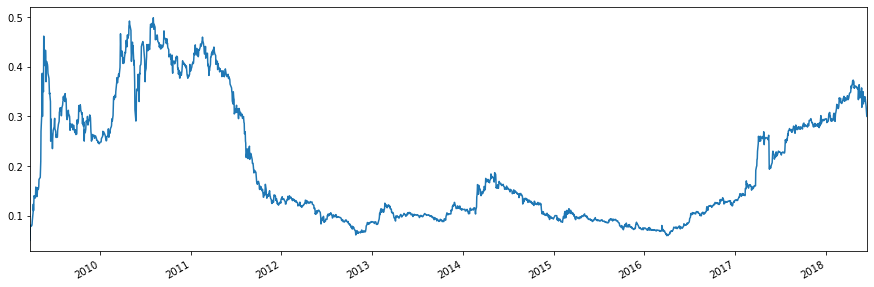

In [47]:
ts_data.plot(figsize=(15, 5))

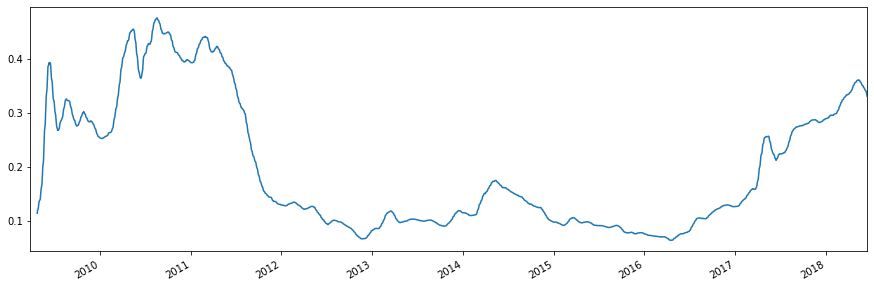

In [51]:
ts_data_ma = ts_data.rolling(20).mean()
ts_data_ma.plot(figsize=(15, 5))

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
result = seasonal_decompose(ts_data)
result.plot()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None